# Análisis de mantenimiento predictivo de transformadores (Modelo Macro)

Datos extraidos de: https://www.sciencedirect.com/science/article/pii/S2352340921007368
'Compañia Energética de Occidente' at Cauca Department (Colombia) 


Zhou, X., Lin, J., Xu, X., Wang, Z., & Zhang, Y. (2021). Data-driven predictive maintenance for a fleet of high-speed trains: A deep learning approach. Data in Brief, 38, 107380.

## Columnas del dataset a analizar

- **LOCATION**: Indica si el transformador está en una zona urbana (1) o rural (0).

  **Importancia**: Los entornos rurales o urbanos pueden tener distintos riesgos asociados. Por ejemplo, en áreas rurales puede haber más descargas atmosféricas que afectan los transformadores, mientras que en zonas urbanas el sobreuso puede ser un problema.

- **POWER**: Capacidad del transformador en kilovoltios-amperios (kVA).

  **Importancia**: Transformadores con mayor capacidad pueden estar sometidos a más estrés, especialmente si operan cerca de su límite, lo cual aumenta la probabilidad de fallo.

- **SELF-PROTECTION**: Indica si el transformador tiene un interruptor de protección de baja tensión (1 si tiene protección, 0 si no).

  **Importancia**: Los transformadores sin protección pueden ser más susceptibles a fallas, especialmente ante sobrecargas o cortocircuitos.

- **Average earth discharge density DDT [Rays/km^2-año]**: Densidad promedio anual de descargas atmosféricas en la zona del transformador.

  **Importancia**: En áreas con alta densidad de rayos, los transformadores pueden sufrir daños recurrentes, lo que incrementa la probabilidad de fallo.

- **Maximum ground discharge density DDT [Rays/km^2-año]**: Máxima densidad anual de rayos en la ubicación del transformador.

  **Importancia**: Similar al promedio, pero indica el riesgo máximo que ha enfrentado el transformador, relevante en zonas de alta exposición a descargas.

- **Burning rate [Failures/year]**: Tasa de fallas en el transformador, calculada en fallas por año.

  **Importancia**: Una alta tasa de quemado indica una mayor probabilidad de fallo futuro, especialmente si el transformador ha tenido reparaciones recurrentes.

- **Criticality according to previous study for ceramics level**: Indica si el transformador está en una zona de alto riesgo según estudios previos (1 para zonas críticas, 0 para zonas normales).

  **Importancia**: La criticidad geográfica es un factor importante, ya que transforma esta variable en un indicador directo de exposición a factores ambientales que pueden incrementar los fallos.

- **Removable connectors**: Si el transformador tiene conectores de media tensión removibles (1 si los tiene, 0 si no).

  **Importancia**: La facilidad de acceso a conectores removibles puede facilitar el mantenimiento, reduciendo la probabilidad de fallas graves.

- **Type of clients**: Describe el tipo de cliente (residencial, comercial, industrial, etc.) que depende del transformador.

  **Importancia**: Los usuarios comerciales e industriales pueden ejercer mayor demanda en el transformador, incrementando la posibilidad de fallo debido al sobreuso o fluctuaciones de carga.

- **Number of users**: Cantidad de usuarios que el transformador abastece.

  **Importancia**: Un mayor número de usuarios implica más carga y estrés en el transformador, aumentando la probabilidad de que se queme.

- **Electric power not supplied EENS [kWh]**: Cantidad de electricidad no suministrada (en kWh) debido a fallas.

  **Importancia**: Cuanto mayor es la energía no suministrada, más graves son las fallas, lo que puede indicar problemas serios en el transformador.

- **Type of installation**: Especifica la estructura de instalación del transformador (como en cabina, poste, etc.).

  **Importancia**: Algunos tipos de instalación pueden ser más vulnerables a condiciones externas; por ejemplo, instalaciones al aire libre están más expuestas a descargas y condiciones climáticas extremas.

- **Air network**: Indica si la red de baja tensión del transformador es aérea (1) o subterránea (0).

  **Importancia**: Redes aéreas suelen ser más vulnerables a eventos climáticos que las subterráneas, aumentando la probabilidad de fallas.

- **Circuit Queue**: Indica si el transformador está en el extremo final del circuito de media tensión (1 si es el extremo, 0 si no).

  **Importancia**: Los transformadores en la cola del circuito pueden estar sometidos a mayores fluctuaciones de voltaje, lo que podría aumentar su desgaste y posibilidad de fallo.

- **km of network LT**: Longitud de la red de baja tensión conectada al transformador, en kilómetros.

  **Importancia**: Redes largas pueden provocar pérdidas de energía y sobrecargas en el transformador, elevando la probabilidad de falla.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Dataset_Year_2019.xlsx')
df.head(2)

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2019
0,1,112.5,0,3.155602,6.6,0.0,0,1,STRATUM 2,94,1822.5,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.0,0,1,OFFICIAL,1,270.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.30036,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

In [4]:
a=pd.DataFrame(df.groupby('Burned transformers 2019')['POWER'].count()).reset_index()
del(a['Burned transformers 2019'])
a['Estado']=['SIN QUEMAR','QUEMADOS']
a = a[['Estado', 'POWER']] #Reordenando las columnas
a

,Estado,POWER
0,SIN QUEMAR,15066
1,QUEMADOS,807


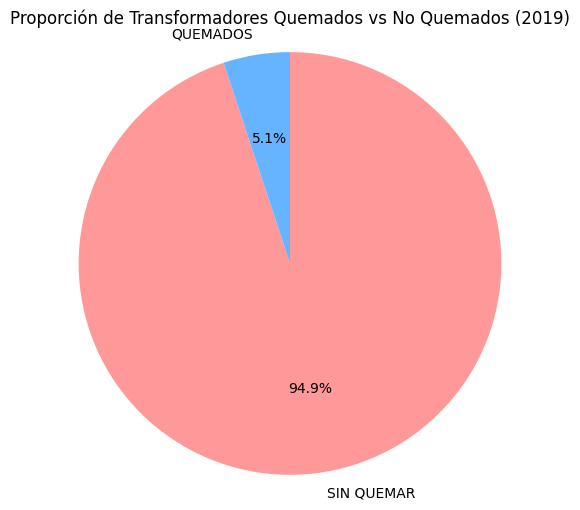

In [5]:

# Data for the pie chart (counts of burned and not burned transformers)
labels = a['Estado']
sizes = a['POWER']
colors = ['#ff9999','#66b3ff']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Proporción de Transformadores Quemados vs No Quemados (2019)')

# Show the plot
plt.show()


Solo el 5% de los transformadores se quemaron en 2019, lo que sugiere que las fallas son eventos raros pero críticos, donde el análisis predictivo podría ser clave para evitar interrupciones y mejorar la gestión del mantenimiento.

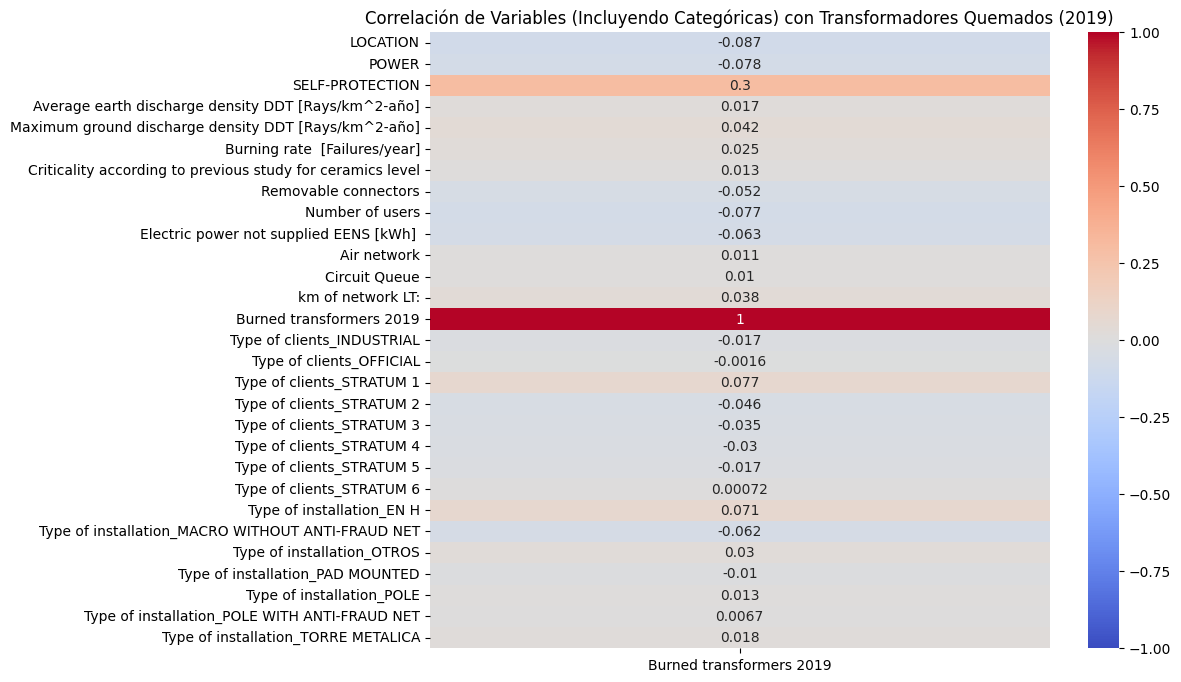

In [6]:
# Convertir las variables categóricas a dummies
df_dummies = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación con las variables dummificadas
corr_matrix = df_dummies.corr()

# Extraer las correlaciones con respecto a la variable objetivo ('Burned transformers 2019')
corr_with_burned = corr_matrix[['Burned transformers 2019']]

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_burned, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title('Correlación de Variables (Incluyendo Categóricas) con Transformadores Quemados (2019)')
plt.show()


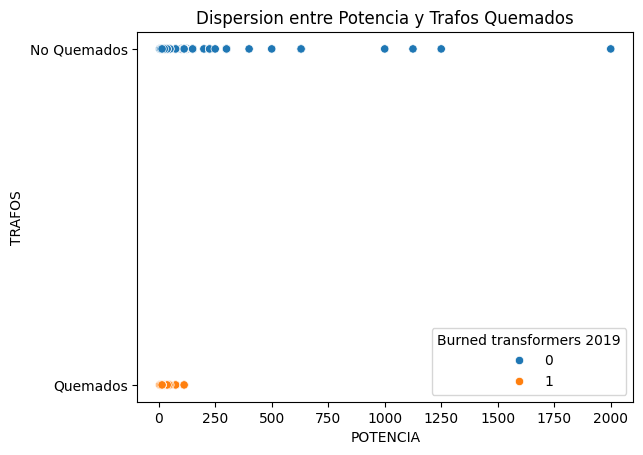

Potencia promedio de transformadores quemados: 15.24 kVA
Potencia promedio de transformadores no quemados: 27.92 kVA
La media aritmetica de los quemados es mucho mas baja que los no quemados


In [8]:
# Convertir la columna 'Burned transformers 2019' a valores categóricos
df['Estado'] = df['Burned transformers 2019'].map({0: 'No Quemados', 1: 'Quemados'})

sns.scatterplot(data=df, x='POWER', y='Estado',hue='Burned transformers 2019')
plt.title("Dispersion entre Potencia y Trafos Quemados")
plt.xlabel("POTENCIA")
plt.ylabel("TRAFOS")
plt.show()

mean_power_burned = df[df['Burned transformers 2019'] == 1]['POWER'].mean()
mean_power_not_burned = df[df['Burned transformers 2019'] == 0]['POWER'].mean()

print(f'Potencia promedio de transformadores quemados: {mean_power_burned:.2f} kVA')
print(f'Potencia promedio de transformadores no quemados: {mean_power_not_burned:.2f} kVA')
print('La media aritmetica de los quemados es mucho mas baja que los no quemados')

In [7]:
# Cantidad de trafos por localidad
b = pd.DataFrame(df.groupby('LOCATION')['Burned transformers 2019'].agg(cantidad_trafos='count', quemados='sum'))
b = b.reset_index()  # Reseteamos el índice para trabajar con una columna LOCATION
b['LOCALIDAD'] = ['Rural','Urbana']
# Reordenamos las columnas
b = b[['LOCALIDAD', 'cantidad_trafos', 'quemados']]
# Calculamos el porcentaje de quemados respecto a la cantidad de trafos en cada fila
# Calculamos el porcentaje de quemados respecto a la cantidad de trafos en cada fila y lo formateamos como un string con porcentaje
b['quemados porcentual'] = b.apply(lambda row: f"{(row['quemados'] / row['cantidad_trafos']) * 100:.2f}%", axis=1)
b




,LOCALIDAD,cantidad_trafos,quemados,quemados porcentual
0,Rural,13112,782,5.96%
1,Urbana,2761,25,0.91%


## Tipos de clientes
### Estratos socioeconómicos (STRATUM 1 a 6)
En Colombia, los hogares y áreas residenciales están clasificados en estratos del 1 al 6, donde:

- **Estrato 1**: Población de menores ingresos.
- **Estrato 2 y 3**: Clases de ingresos bajos y medio-bajos.
- **Estrato 4 a 6**: Ingresos medios a altos. Estos últimos estratos suelen pagar tarifas más altas para subsidiar a los de menor ingreso.

### COMERCIAL
Incluye clientes comerciales, como tiendas, oficinas, y otros negocios que utilizan electricidad para sus operaciones.

### INDUSTRIAL
Este tipo de cliente representa industrias o fábricas que suelen consumir mayores cantidades de energía eléctrica debido a la maquinaria y equipos necesarios para sus procesos de producción.

### OFFICIAL
Hace referencia a edificios o instalaciones de tipo oficial, como instituciones gubernamentales o edificios públicos.


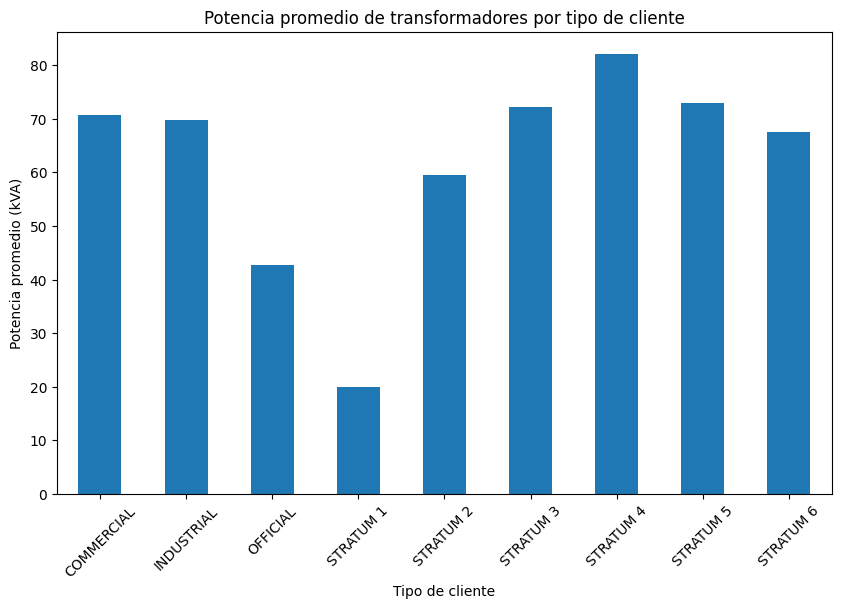

In [8]:
# Potencia promedio por tipo de cliente
potencia_por_cliente = df.groupby('Type of clients')['POWER'].mean()
potencia_por_cliente.plot(kind='bar', figsize=(10, 6))
plt.title('Potencia promedio de transformadores por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Potencia promedio (kVA)')
plt.xticks(rotation=45)
plt.show()

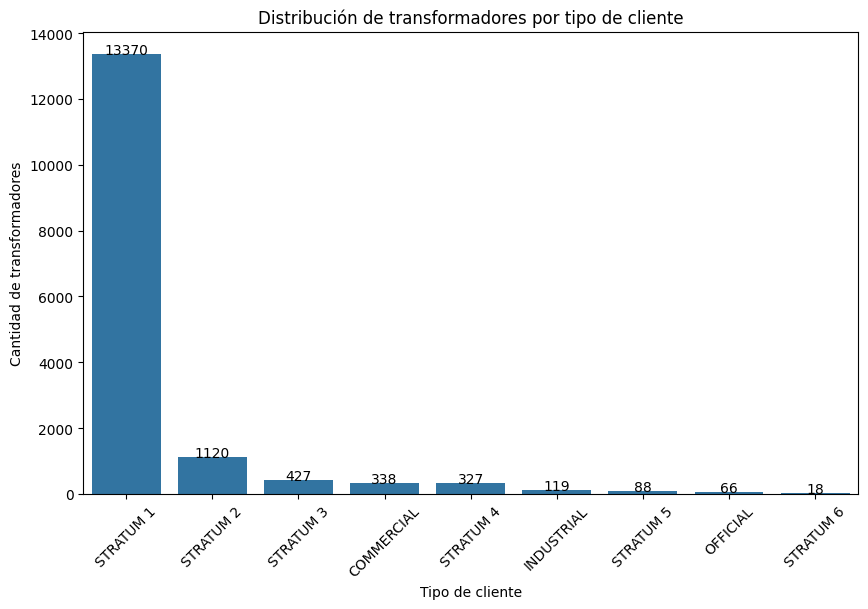

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo por tipo de cliente
cliente_counts = df['Type of clients'].value_counts()

# Graficamos
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cliente_counts.index, y=cliente_counts.values)
plt.title('Distribución de transformadores por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad de transformadores')
plt.xticks(rotation=45)

# Añadir etiquetas encima de cada barra
for index, value in enumerate(cliente_counts.values):
    ax.text(index, value + 0.5, str(value), ha='center')

plt.show()



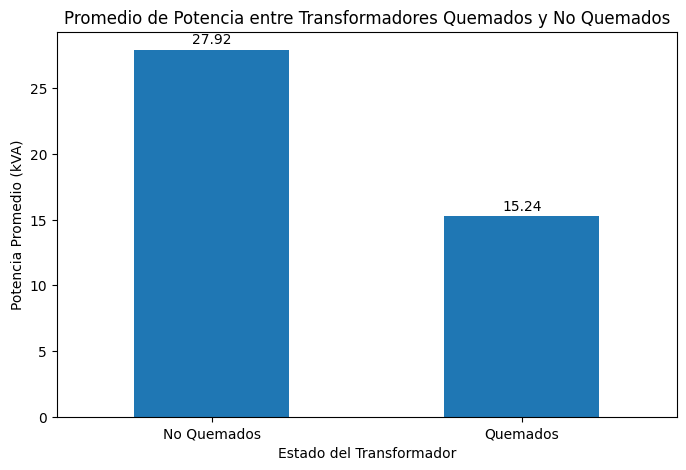

In [10]:
# Promedio de potencia para transformadores quemados y no quemados
potencia_promedio = df.groupby('Burned transformers 2019')['POWER'].mean()

# Graficamos
ax = potencia_promedio.plot(kind='bar', figsize=(8, 5))
plt.title('Promedio de Potencia entre Transformadores Quemados y No Quemados')
plt.xlabel('Estado del Transformador')
plt.ylabel('Potencia Promedio (kVA)')
plt.xticks([0, 1], ['No Quemados', 'Quemados'], rotation=0)  # Cambiamos las etiquetas

# Añadir etiquetas encima de cada barra
for index, value in enumerate(potencia_promedio.values):
    ax.text(index, value + 0.5, f"{value:.2f}", ha='center')

plt.show()




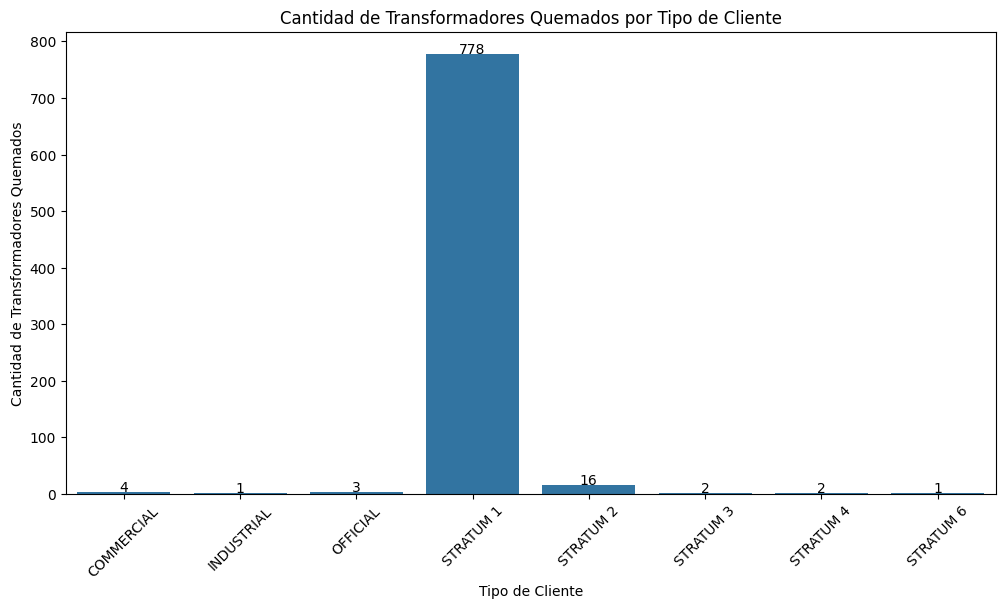

In [11]:
# Filtramos solo los transformadores quemados
burned_by_client_type = df[df['Burned transformers 2019'] == 1].groupby('Type of clients').size()

# Graficamos
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=burned_by_client_type.index, y=burned_by_client_type.values)
plt.title('Cantidad de Transformadores Quemados por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad de Transformadores Quemados')
plt.xticks(rotation=45)

# Añadir etiquetas encima de cada barra
for index, value in enumerate(burned_by_client_type.values):
    ax.text(index, value + 0.5, str(value), ha='center')

plt.show()


### Columna: `Self-Protection`

La columna **`Self-Protection`** en el dataset indica si un transformador tiene un sistema de **protección interna de bajo voltaje**. Este sistema es importante ya que protege al transformador de condiciones adversas como sobrecargas o cortocircuitos, lo cual puede reducir la probabilidad de fallos o quemaduras.

- **Valor `1`**: El transformador **tiene protección interna**. Esto significa que cuenta con un dispositivo que puede desconectar el transformador automáticamente en caso de sobrecarga o fallo, ayudando a prevenir daños.
- **Valor `0`**: El transformador **no tiene protección interna**, lo que lo hace más vulnerable a fallos o quemaduras en condiciones de sobrecarga o cortocircuito.

Esta característica es relevante en el análisis de mantenimiento predictivo, ya que los transformadores sin protección interna pueden tener un riesgo más alto de fallos o daños severos.


### Ejemplos de Self-Protection en Transformadores

1. **Fusibles de Expulsión o Tipo Bayoneta**:
   - Estos fusibles se encuentran en el lado de baja tensión del transformador y están diseñados para fundirse cuando la corriente excede un nivel seguro. Al fundirse, desconectan el transformador, evitando daños graves debido a sobrecargas temporales.

2. **Relés de Sobrecorriente**:
   - Monitorean continuamente la corriente en el transformador y activan el sistema de protección si detectan una sobrecarga o cortocircuito. Estos relés son ajustables y se adaptan a las características específicas del transformador, asegurando una respuesta adecuada a condiciones de falla.

3. **Dispositivos de Desconexión Térmica**:
   - Algunos transformadores cuentan con sensores térmicos que miden la temperatura del aceite o del núcleo. Si la temperatura supera un límite seguro, el dispositivo desconecta automáticamente el transformador para prevenir el sobrecalentamiento y proteger el equipo.


Porcentaje de Transformadores Quemados por Estado de Self-Protection:
SELF-PROTECTION
0     2.884144
1    24.874055
Name: Burned transformers 2019, dtype: float64


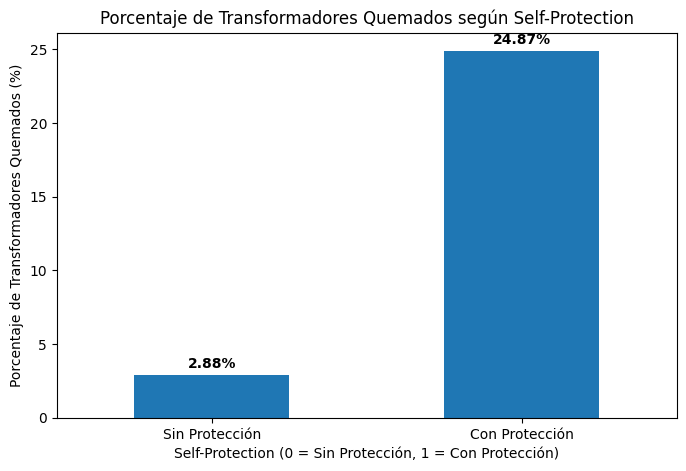

In [12]:
# Calculamos el porcentaje de transformadores quemados para cada estado de Self-Protection
burn_rate_by_protection = df.groupby('SELF-PROTECTION')['Burned transformers 2019'].mean() * 100

# Mostramos los resultados en la consola
print("Porcentaje de Transformadores Quemados por Estado de Self-Protection:")
print(burn_rate_by_protection)

# Configuramos el gráfico
plt.figure(figsize=(8, 5))

burn_rate_by_protection.plot(kind='bar')

# Añadimos detalles al gráfico
plt.title('Porcentaje de Transformadores Quemados según Self-Protection')
plt.xlabel('Self-Protection (0 = Sin Protección, 1 = Con Protección)')
plt.ylabel('Porcentaje de Transformadores Quemados (%)')
plt.xticks([0, 1], ['Sin Protección', 'Con Protección'], rotation=0)

# Añadir etiquetas de porcentaje encima de cada barra
for index, value in enumerate(burn_rate_by_protection.values):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center', color='black', fontweight='bold')

plt.show()


### Conclusiones de la Relación entre Self-Protection y Transformadores Quemados

1. **Alta Tasa de Fallos en Transformadores con Protección Interna**: Los transformadores con **Self-Protection** presentan una tasa de quemado (24.87%) significativamente mayor que aquellos sin protección (2.88%). Esto sugiere que la protección interna no está reduciendo el riesgo de fallos como se esperaría.

2. **Posibles Causas**: Esta tendencia podría indicar que los transformadores con Self-Protection están en áreas de mayor carga o condiciones severas que sobrepasan su capacidad, o que el sistema de protección no está funcionando óptimamente.

3. **Sugerencia**: Sería recomendable evaluar y recalibrar los sistemas de protección y realizar un monitoreo predictivo en estos transformadores para identificar fallos antes de que ocurran.

**Hipótesis**: La alta tasa de fallos puede deberse a que la protección interna no se activa en todas las situaciones críticas o que los transformadores están sometidos a cargas superiores a su capacidad esperada.


### Tipos de Instalación en Transformadores

1. **Cabina**:
   - Instalación en una estructura cerrada, protegiendo al transformador de factores ambientales. Común en áreas urbanas para mayor seguridad.

2. **Estructura Tipo H**:
   - Montaje en una estructura de postes en forma de "H". Permite una instalación elevada, generalmente para redes de distribución.

3. **Macro con Red Anti-Fraude**:
   - Instalación que incluye una red para prevenir conexiones ilegales. Frecuente en zonas con alta incidencia de fraudes eléctricos.

4. **Pad Mounted**:
   - Transformador montado en una plataforma a nivel del suelo. Usado en áreas urbanas y residenciales, fácil de mantener y seguro.

5. **Poste Sencillo**:
   - Transformador instalado en un solo poste. Es una instalación común en áreas rurales por su simplicidad y bajo costo.

6. **Poste con Red Anti-Fraude**:
   - Similar al poste sencillo, pero con una red anti-fraude para evitar conexiones no autorizadas.

7. **Torre Metálica**:
   - Instalación en torres de metal, usada principalmente en sistemas de alta tensión o en terrenos difíciles.

8. **Otros**:
   - Incluye instalaciones especiales o no convencionales adaptadas a requisitos específicos del lugar o condiciones ambientales.


C:\Users\guill\AppData\Local\Temp\ipykernel_12540\4154136693.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=burned_by_installation.index, y=burned_by_installation.values, palette="viridis")


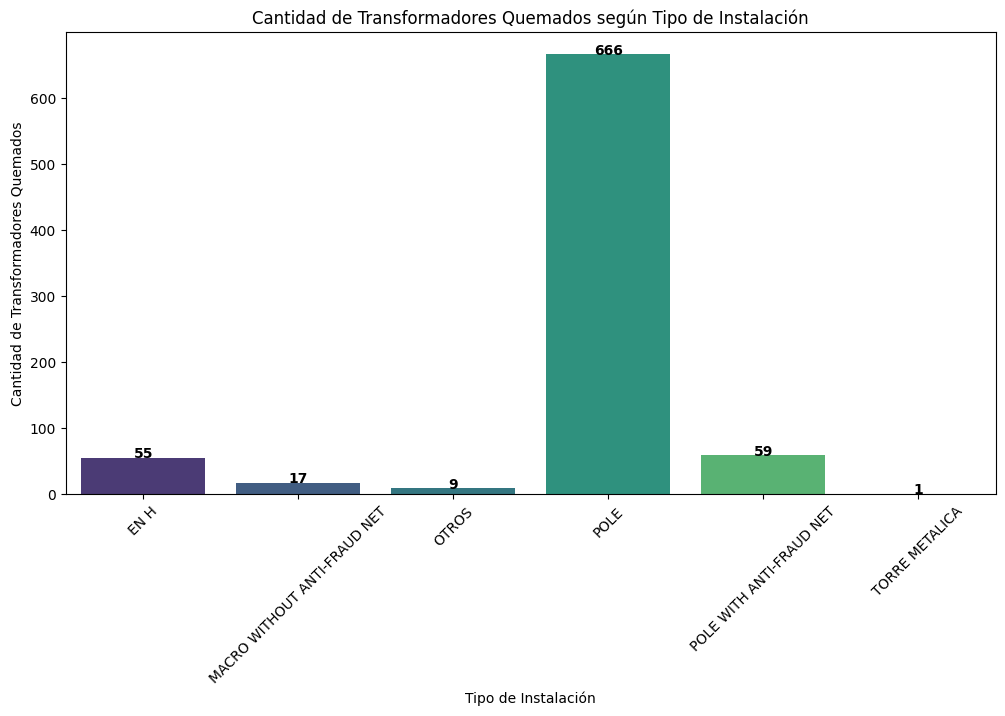

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por tipo de instalación y contar transformadores quemados
burned_by_installation = df[df['Burned transformers 2019'] == 1].groupby('Type of installation').size()

# Graficar
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=burned_by_installation.index, y=burned_by_installation.values, palette="viridis")
plt.title('Cantidad de Transformadores Quemados según Tipo de Instalación')
plt.xlabel('Tipo de Instalación')
plt.ylabel('Cantidad de Transformadores Quemados')
plt.xticks(rotation=45)

# Añadir etiquetas encima de cada barra
for index, value in enumerate(burned_by_installation.values):
    ax.text(index, value + 0.5, str(value), ha='center', fontweight='bold')

plt.show()


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de clasificación
# Convertir variables categóricas a variables numéricas con One-Hot Encoding
X = pd.get_dummies(df.drop(columns=['Burned transformers 2019']), drop_first=True)
y = df['Burned transformers 2019']

# Entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Importancia de las características
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Importancia de las características:")
print(feature_importances)


Importancia de las características:
km of network LT:                                             0.233837
Number of users                                               0.152495
Electric power not supplied EENS [kWh]                        0.131662
SELF-PROTECTION                                               0.097440
Average earth discharge density DDT [Rays/km^2-año]           0.089997
Maximum ground discharge density DDT [Rays/km^2-año]          0.085769
POWER                                                         0.047207
Burning rate  [Failures/year]                                 0.046708
Circuit Queue                                                 0.029176
Removable connectors                                          0.021261
Criticality according to previous study for ceramics level    0.018594
Type of installation_POLE                                     0.009454
Type of installation_POLE WITH ANTI-FRAUD NET                 0.008707
Type of installation_EN H                

In [15]:
X.columns

Index(['LOCATION', 'POWER', 'SELF-PROTECTION',
       'Average earth discharge density DDT [Rays/km^2-año]',
       'Maximum ground discharge density DDT [Rays/km^2-año]',
       'Burning rate  [Failures/year]',
       'Criticality according to previous study for ceramics level',
       'Removable connectors', 'Number of users',
       'Electric power not supplied EENS [kWh] ', 'Air network',
       'Circuit Queue', 'km of network LT:', 'Type of clients_INDUSTRIAL',
       'Type of clients_OFFICIAL', 'Type of clients_STRATUM 1',
       'Type of clients_STRATUM 2', 'Type of clients_STRATUM 3',
       'Type of clients_STRATUM 4', 'Type of clients_STRATUM 5',
       'Type of clients_STRATUM 6', 'Type of installation_EN H',
       'Type of installation_MACRO WITHOUT ANTI-FRAUD NET',
       'Type of installation_OTROS', 'Type of installation_PAD MOUNTED',
       'Type of installation_POLE',
       'Type of installation_POLE WITH ANTI-FRAUD NET',
       'Type of installation_TORRE METALICA']

In [16]:
# Ajuste de los nombres para que coincidan exactamente con las columnas en X
selected_features = [
    'km of network LT:', 'Number of users', 'Electric power not supplied EENS [kWh] ',
    'SELF-PROTECTION', 'Average earth discharge density DDT [Rays/km^2-año]',
    'Maximum ground discharge density DDT [Rays/km^2-año]', 'POWER',
    'Burning rate  [Failures/year]', 'Circuit Queue'
]

# Selección de las características en X
X_selected = X[selected_features]


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_selected, y)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)


In [24]:
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


c:\Users\guill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Evaluación del Modelo de Regresión Logística con SMOTE:
Accuracy: 0.69
Precision: 0.66
Recall: 0.75
F1-Score: 0.70


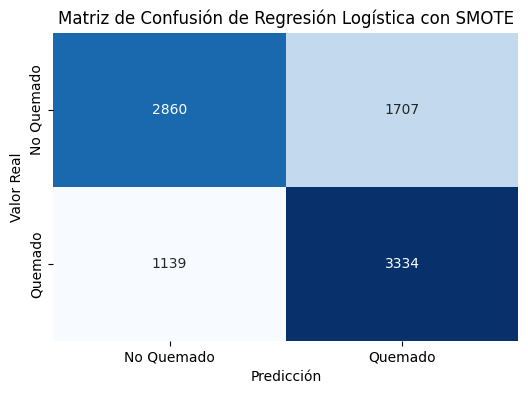

In [25]:
# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Evaluación del Modelo de Regresión Logística con SMOTE:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calcular y graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Quemado', 'Quemado'], yticklabels=['No Quemado', 'Quemado'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión de Regresión Logística con SMOTE")
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## ¿Qué es Random Forest?

**Random Forest** es un tipo de modelo de machine learning que se utiliza para hacer predicciones y clasificaciones. La idea principal es combinar el poder de muchos modelos sencillos (llamados árboles de decisión) para crear un modelo mucho más robusto y preciso.

Un **árbol de decisión** funciona como un conjunto de preguntas que se responden de manera secuencial, llevando a una predicción al final. Random Forest crea muchos de estos árboles de decisión y combina sus resultados (como una "votación") para obtener la mejor respuesta posible. Este proceso ayuda a reducir errores y hace que el modelo sea más estable y preciso.

## ¿Qué es SMOTE?

**SMOTE** (Synthetic Minority Over-sampling Technique) es una técnica para manejar el desequilibrio en los datos. A veces, en un conjunto de datos, hay muchas más instancias de una categoría que de otra (por ejemplo, muchas personas sin deuda en comparación con pocas personas con deuda). Este desequilibrio puede causar problemas porque el modelo puede "aprender" a ignorar la categoría menos frecuente.

Para resolver esto, SMOTE crea ejemplos sintéticos (o falsos) de la categoría minoritaria. Lo hace combinando los datos reales de esa categoría para generar ejemplos similares, equilibrando el conjunto de datos. Esto ayuda al modelo a tener en cuenta ambas categorías de forma más justa.

## Random Forest + SMOTE: ¿Por qué juntos?

Al combinar **Random Forest** con **SMOTE**, podemos crear un modelo que:
1. Aprovecha la precisión y estabilidad de Random Forest.
2. Maneja el problema de datos desequilibrados, lo que mejora su capacidad de reconocer correctamente las categorías minoritarias.


Evaluación del Modelo Random Forest con SMOTE:
Accuracy: 0.96
Precision: 0.96
Recall: 0.95
F1-Score: 0.96


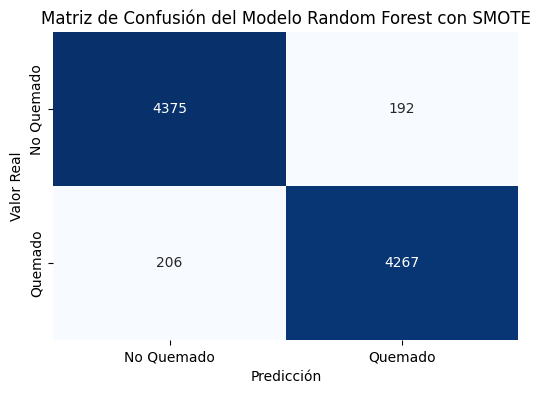

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Imprimir las métricas de evaluación
print("Evaluación del Modelo Random Forest con SMOTE:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# Calcular y graficar la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Quemado', 'Quemado'], yticklabels=['No Quemado', 'Quemado'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Modelo Random Forest con SMOTE")
plt.show()


# Métricas de Evaluación de Modelos de Machine Learning

Para evaluar la eficacia de un modelo de clasificación, se suelen usar estas cuatro métricas clave:

## 1. Accuracy (Exactitud)
Es el porcentaje de predicciones correctas sobre el total de predicciones. Indica qué tan bien el modelo clasifica correctamente en general, pero puede ser engañosa si los datos están desequilibrados.

## 2. Precision (Precisión)
Indica el porcentaje de predicciones positivas correctas entre todas las predicciones positivas realizadas. Es útil cuando queremos minimizar los falsos positivos (predicciones incorrectamente positivas).

## 3. Recall (Sensibilidad o Cobertura)
Mide el porcentaje de predicciones positivas correctas entre todos los casos verdaderamente positivos. Es útil cuando queremos capturar la mayor cantidad de verdaderos positivos y minimizar los falsos negativos.

## 4. F1 Score
Es la media armónica de la precisión y el recall. El F1 Score es útil cuando hay un desequilibrio de clases, ya que da una única métrica que balancea precisión y recall.


### Evaluación del Modelo Random Forest con SMOTE

**Accuracy (0.96)**:  
La **precisión general** del modelo es del 96%, lo cual indica que el modelo clasifica correctamente la mayoría de los transformadores, ya sean quemados o no. La **accuracy** mide cuántas de las predicciones del modelo son correctas sobre el total de predicciones realizadas, pero no siempre refleja bien el rendimiento si las clases están desbalanceadas.

**Precision (0.96)**:  
La **precisión** del 96% indica que de todos los transformadores que el modelo predijo como quemados, el 96% efectivamente estaban quemados. Esta métrica mide la capacidad del modelo para evitar **falsos positivos**. En el contexto de transformadores, tener alta precisión significa minimizar los mantenimientos innecesarios, evitando costos adicionales.

**Recall (0.95)**:  
El **recall** del 95% indica que el modelo fue capaz de detectar el 95% de los transformadores realmente quemados. Esta métrica mide la capacidad del modelo para identificar **falsos negativos** (es decir, transformadores quemados que no fueron detectados). Un alto recall es fundamental en la detección de fallos, ya que reduce el riesgo de pasar por alto transformadores en riesgo, minimizando fallas inesperadas y tiempos de inactividad.

**F1-Score (0.96)**:  
El **F1-Score** combina tanto la **precisión** como el **recall** en un solo valor. El F1-Score de 0.96 indica que el modelo logra un buen equilibrio entre evitar falsos positivos y capturar correctamente los transformadores quemados. Es una métrica importante cuando hay un desbalance entre clases (como en este caso, donde los transformadores quemados son una minoría) ya que permite tener en cuenta ambos tipos de error.

---

### Matriz de Confusión

- **Verdaderos Negativos (4375)**:  
  Transformadores correctamente identificados como no quemados. Indica que el modelo es preciso en evitar falsos positivos.

- **Falsos Positivos (192)**:  
  Transformadores que fueron clasificados incorrectamente como quemados. Estos errores pueden implicar costos adicionales por mantenimiento innecesario.

- **Falsos Negativos (206)**:  
  Transformadores quemados que el modelo no detectó. Representan casos donde el fallo no fue anticipado, lo que puede resultar en pérdidas no planificadas.

- **Verdaderos Positivos (4267)**:  
  Transformadores correctamente clasificados como quemados. Esto refleja la capacidad del modelo para identificar fallos potenciales y prevenir problemas.

---

### Conclusión
El modelo muestra una alta precisión y recall, lo que lo hace confiable para la detección de transformadores quemados. La baja cantidad de falsos negativos y falsos positivos sugiere que el modelo es efectivo para optimizar los costos de mantenimiento y minimizar los riesgos de fallos inesperados.
